In [1]:
import pandas as pd
import numpy as np
import spacy

In [2]:
from spacy.lang.en.stop_words import STOP_WORDS as stopwords

In [3]:
df = pd.read_csv("twitter4000.csv",encoding="latin1")

In [4]:
df.head()

,twitts,sentiment
0,is bored and wants to watch a movie any sugge...,0
1,back in miami. waiting to unboard ship,0
2,"@misskpey awwww dnt dis brng bak memoriessss, ...",0
3,ughhh i am so tired blahhhhhhhhh,0
4,@mandagoforth me bad! It's funny though. Zacha...,0


In [5]:
df.sentiment.value_counts()

1    2000
0    2000
Name: sentiment, dtype: int64

### Word Counts
- len of words in a sentence

In [6]:
df['word_counts'] = df.twitts.apply(lambda x:len(x.split()))
df.head()

,twitts,sentiment,word_counts
0,is bored and wants to watch a movie any sugge...,0,10
1,back in miami. waiting to unboard ship,0,7
2,"@misskpey awwww dnt dis brng bak memoriessss, ...",0,12
3,ughhh i am so tired blahhhhhhhhh,0,6
4,@mandagoforth me bad! It's funny though. Zacha...,0,26


In [7]:
df['word_counts'].min()

1

In [8]:
df['word_counts'].max()

32

In [9]:
df[df.word_counts==1]

,twitts,sentiment,word_counts
385,homework,0,1
691,@ekrelly,0,1
1124,disappointed,0,1
1286,@officialmgnfox,0,1
1325,headache,0,1
1897,@MCRmuffin,0,1
2542,Graduated!,1,1
2947,reading,1,1
3176,@omeirdeleon,1,1
3470,www.myspace.com/myfinalthought,1,1


### Character Counts

In [10]:
def char_counts(x):
    s = x.split()
    x = "".join(s)
    return len(x)

In [11]:
df["char_counts"] = df['twitts'].apply(lambda x:char_counts(x))

In [12]:
df.head() 

,twitts,sentiment,word_counts,char_counts
0,is bored and wants to watch a movie any sugge...,0,10,43
1,back in miami. waiting to unboard ship,0,7,32
2,"@misskpey awwww dnt dis brng bak memoriessss, ...",0,12,54
3,ughhh i am so tired blahhhhhhhhh,0,6,27
4,@mandagoforth me bad! It's funny though. Zacha...,0,26,116


### Average Word Length

In [13]:
x = "hello world" # 10/2 = 5; 10 total chars; 2 total words

In [14]:
df['average_word_length'] =  df['char_counts']/ df['word_counts']
df.head()

,twitts,sentiment,word_counts,char_counts,average_word_length
0,is bored and wants to watch a movie any sugge...,0,10,43,4.300000
1,back in miami. waiting to unboard ship,0,7,32,4.571429
2,"@misskpey awwww dnt dis brng bak memoriessss, ...",0,12,54,4.500000
3,ughhh i am so tired blahhhhhhhhh,0,6,27,4.500000
4,@mandagoforth me bad! It's funny though. Zacha...,0,26,116,4.461538


### Stop words count
- Stop words occur frequently in corpus
- These words do not represent the context for the sentence
- we can remove stopwords.
- in sentiment analysis not is a important word.

In [15]:
print(stopwords) # imported from spacy

{'himself', 'their', 'even', 'us', 'latterly', 'mostly', 'only', 'our', 'seeming', 'is', 'someone', 'everything', 'any', 'moreover', 'forty', 'to', 'herself', 'too', 'but', 'will', 'serious', 'last', '’ll', 'whenever', 'alone', 'elsewhere', 'from', 'when', 'may', 'does', 'do', 'within', 'anyhow', 'see', 'them', 'whether', 'being', "'d", 'per', 'used', 'hers', 'regarding', 'this', 'although', 'along', '‘d', 'am', 'never', 'together', 'ten', 'one', 'amount', 'often', 'i', 'something', 'sometime', 'seems', 'take', 'five', 'well', 'yours', 'should', 'six', 'a', 'as', 'more', 'they', 'thru', 'until', 'because', 'herein', 'whither', 'been', 'both', 'sixty', 'while', 'were', 'whence', 'hence', 'really', 'nowhere', 'behind', 'on', 'during', 'three', 'amongst', 'are', 'we', '‘ll', 'out', 'how', 'him', 'eleven', 'ours', 'call', 'over', 'fifty', 'become', 'an', 'than', 'thence', 'across', 'where', 'hundred', 'was', 'seem', 'back', 'again', 'please', '’d', 'itself', 'almost', 'least', 'various', '

In [16]:
len(stopwords)

326

In [17]:
x = "this is the text data"
x.split()

['this', 'is', 'the', 'text', 'data']

In [18]:
len([i for i in x.split() if i in stopwords])

3

In [19]:
df['stop_words_len'] = df.twitts.apply(lambda x:len([i for i in x.split() if i in stopwords]))
df.head()

,twitts,sentiment,word_counts,char_counts,average_word_length,stop_words_len
0,is bored and wants to watch a movie any sugge...,0,10,43,4.300000,5
1,back in miami. waiting to unboard ship,0,7,32,4.571429,3
2,"@misskpey awwww dnt dis brng bak memoriessss, ...",0,12,54,4.500000,0
3,ughhh i am so tired blahhhhhhhhh,0,6,27,4.500000,3
4,@mandagoforth me bad! It's funny though. Zacha...,0,26,116,4.461538,13


### Count # and @

In [20]:
x = 'this is a #hastag and this is mention'
x.split()

['this', 'is', 'a', '#hastag', 'and', 'this', 'is', 'mention']

In [21]:
df["hashtagcount"] = df.twitts.apply(lambda x:len([i for i in x.split() if i.startswith("#")]))
df["@count"] = df.twitts.apply(lambda x:len([i for i in x.split() if i.startswith("@")]))
df.head()

,twitts,sentiment,word_counts,char_counts,average_word_length,stop_words_len,hashtagcount,@count
0,is bored and wants to watch a movie any sugge...,0,10,43,4.300000,5,0,0
1,back in miami. waiting to unboard ship,0,7,32,4.571429,3,0,0
2,"@misskpey awwww dnt dis brng bak memoriessss, ...",0,12,54,4.500000,0,0,1
3,ughhh i am so tired blahhhhhhhhh,0,6,27,4.500000,3,0,0
4,@mandagoforth me bad! It's funny though. Zacha...,0,26,116,4.461538,13,0,2


### Digit is present or not

In [22]:
df["Numeric_counts"] = df.twitts.apply(lambda x: len([i for i in x.split() if i.isdigit()]))

In [23]:
df.head()

,twitts,sentiment,word_counts,char_counts,average_word_length,stop_words_len,hashtagcount,@count,Numeric_counts
0,is bored and wants to watch a movie any sugge...,0,10,43,4.300000,5,0,0,0
1,back in miami. waiting to unboard ship,0,7,32,4.571429,3,0,0,0
2,"@misskpey awwww dnt dis brng bak memoriessss, ...",0,12,54,4.500000,0,0,1,0
3,ughhh i am so tired blahhhhhhhhh,0,6,27,4.500000,3,0,0,0
4,@mandagoforth me bad! It's funny though. Zacha...,0,26,116,4.461538,13,0,2,0


### Upper Case Word Count

In [24]:
df["upper_words_count"] = df['twitts'].apply(lambda x:len([i for i in x.split() if i.isupper()]))
df.head()

,twitts,sentiment,word_counts,char_counts,average_word_length,stop_words_len,hashtagcount,@count,Numeric_counts,upper_words_count
0,is bored and wants to watch a movie any sugge...,0,10,43,4.300000,5,0,0,0,0
1,back in miami. waiting to unboard ship,0,7,32,4.571429,3,0,0,0,0
2,"@misskpey awwww dnt dis brng bak memoriessss, ...",0,12,54,4.500000,0,0,1,0,1
3,ughhh i am so tired blahhhhhhhhh,0,6,27,4.500000,3,0,0,0,0
4,@mandagoforth me bad! It's funny though. Zacha...,0,26,116,4.461538,13,0,2,0,0


### Preprocessing And Cleaning

### Lower case conversion

In [25]:
df['twitts'] = df['twitts'].apply(lambda x: str(x).lower())
df.head()

,twitts,sentiment,word_counts,char_counts,average_word_length,stop_words_len,hashtagcount,@count,Numeric_counts,upper_words_count
0,is bored and wants to watch a movie any sugge...,0,10,43,4.300000,5,0,0,0,0
1,back in miami. waiting to unboard ship,0,7,32,4.571429,3,0,0,0,0
2,"@misskpey awwww dnt dis brng bak memoriessss, ...",0,12,54,4.500000,0,0,1,0,1
3,ughhh i am so tired blahhhhhhhhh,0,6,27,4.500000,3,0,0,0,0
4,@mandagoforth me bad! it's funny though. zacha...,0,26,116,4.461538,13,0,2,0,0


### Contraction to expansion

In [26]:
contractions = { "ain't": "am not","aren't": "are not","can't": "cannot","can't've": "cannot have",
# "'cause": "because",
"could've": "could have","couldn't": "could not","couldn't've": "could not have","didn't": "did not","doesn't": "does not",
"don't": "do not","hadn't": "had not","hadn't've": "had not have","hasn't": "has not","haven't": "have not",
"he'd": "he had","he'd've": "he would have","he'll": "he will","he'll've": "he will have","he's": "he is",
"how'd": "how did","how'd'y": "how do you","how'll": "how will","I'd": "I had","I'd've": "I would have",
"I'll": "I will","I'll've": "I will have","I'm": "I am","I've": "I have","isn't": "is not","it'd": "it had",
"it'd've": "it would have","it'll": "it will","it'll've": "it will have","it's": "it has","let's": "let us",
"ma'am": "madam","mayn't": "may not","might've": "might have","mightn't": "might not","mightn't've": "might not have",
"must've": "must have","mustn't": "must not","mustn't've": "must not have","needn't": "need not",
"needn't've": "need not have","o'clock": "of the clock","oughtn't": "ought not","oughtn't've": "ought not have",
"shan't": "shall not","sha'n't": "shall not","shan't've": "shall not have","she'd": "she would",
"she'd've": "she would have","she'll": "she will","she'll've": "she will have","she's": "she is",
"should've": "should have","shouldn't": "should not","shouldn't've": "should not have","so've": "so have",
"so's": "so is","that'd": "that would","that'd've": "that would have","there'd've": "there would have",
"they'd've": "they would have","they'll": "they will","they'll've": "they will have","they're": "they are",
"they've": "they have","to've": "to have","wasn't": "was not","we'd": "we would","we'd've": "we would have",
"we'll": "we will","we'll've": "we will have","we're": "we are","we've": "we have","weren't": "were not",
"what'll": "what will","what'll've": "what will have","what're": "what are","what've": "what have",
"when've": "when have","where'd": "where did","where've": "where have","who'll": "who will",
"who'll've": "who will have","who's": "who is","who've": "who have","why've": "why have","will've": "will have",
"won't": "will not","won't've": "will not have","would've": "would have","wouldn't": "would not",
"wouldn't've": "would not have","y'all": "you all","y'all'd": "you all would","y'all'd've": "you all would have",
"y'all're": "you all are","y'all've": "you all have","you'd": "you would","you'd've": "you would have",
"you'll": "you will","you'll've": "you will have","you're": "you are","you've": "you have"
}

In [27]:
def cont_to_exp(x):
    if type(x) is str:
        for key in contractions:
            value = contractions[key]
            x = x.replace(key,value)
        return x
    else:
        return x

In [28]:
cont_to_exp("I can't study")

'I cannot study'

In [29]:
%%timeit
df['twitts'] = df['twitts'].apply(lambda x : cont_to_exp(x))

134 ms ± 8.14 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [30]:
df.sample(5)

,twitts,sentiment,word_counts,char_counts,average_word_length,stop_words_len,hashtagcount,@count,Numeric_counts,upper_words_count
3508,buenos dias fellow twitters!,1,4,25,6.250000,0,0,0,0,0
2804,"@youngq night, lol, sweet dreams!",1,5,29,5.800000,0,0,1,0,4
1601,"@strikeitfierce ahahah. yeahh, ive been good. ...",0,18,95,5.277778,6,0,1,0,0
1622,how is it 8pm on sunday night already...,0,8,33,4.125000,4,0,0,0,0
3371,i joined twitter 236 days ago - http://whendid...,1,11,66,6.000000,0,0,0,1,1


### Remove Email

In [31]:
# df[df['twitts'].str.contains(".com")]

In [32]:
import re

In [33]:
x = "abc@gmail.com is abc"
re.findall("([a-zA-Z0-9_.+-]+@[a-zA-Z0-9-]+\.[a-zA-Z0-9-.]+)", x)

['abc@gmail.com']

In [34]:
x = "abc@gmail.com is abc"
re.findall("([a-zA-Z0-9_.+-]+@[a-zA-Z0-9-]+\.[a-zA-Z0-9-.]+\b)", x)

[]

In [35]:
df["emails"] = df['twitts'].apply(lambda x: re.findall("([a-zA-Z0-9_.+-]+@[a-zA-Z0-9-]+\.[a-zA-Z0-9-.]+)", x))

In [36]:
df['email_count'] = df["emails"].apply(lambda x: len(x))
df.head()

,twitts,sentiment,word_counts,char_counts,average_word_length,stop_words_len,hashtagcount,@count,Numeric_counts,upper_words_count,emails,email_count
0,is bored and wants to watch a movie any sugge...,0,10,43,4.300000,5,0,0,0,0,[],0
1,back in miami. waiting to unboard ship,0,7,32,4.571429,3,0,0,0,0,[],0
2,"@misskpey awwww dnt dis brng bak memoriessss, ...",0,12,54,4.500000,0,0,1,0,1,[],0
3,ughhh i am so tired blahhhhhhhhh,0,6,27,4.500000,3,0,0,0,0,[],0
4,@mandagoforth me bad! it has funny though. zac...,0,26,116,4.461538,13,0,2,0,0,[],0


In [37]:
df[df.email_count>0]

,twitts,sentiment,word_counts,char_counts,average_word_length,stop_words_len,hashtagcount,@count,Numeric_counts,upper_words_count,emails,email_count
3713,@securerecs arghh me please markbradbury_16@h...,1,5,51,10.2,0,0,1,0,0,[markbradbury_16@hotmail.com],1


In [38]:
x = "abc@gmail.com is abc"
re.sub("([a-zA-Z0-9_.+-]+@[a-zA-Z0-9-]+\.[a-zA-Z0-9-.]+)","" ,x)

' is abc'

In [39]:
df['twitts'] = df['twitts'].apply(lambda x: re.sub("([a-zA-Z0-9_.+-]+@[a-zA-Z0-9-]+\.[a-zA-Z0-9-.]+)","" ,x) )

In [40]:
df.iloc[3713]['twitts']

'@securerecs arghh me please  '

### Remove Urls

In [41]:
# stack overflow
url = '<p>Hello World</p><a href="http://example.com">More Examples</a><a href="http://example2.com">Even More Examples</a>'
urls = re.findall('https?://(?:[-\w.]|(?:%[\da-fA-F]{2}))+', url)

In [42]:
urls

['http://example.com', 'http://example2.com']

In [43]:
df['url_counts'] = df['twitts'].apply(lambda x: len(re.findall('https?://(?:[-\w.]|(?:%[\da-fA-F]{2}))+', x)))

In [44]:
df.head()

,twitts,sentiment,word_counts,char_counts,average_word_length,stop_words_len,hashtagcount,@count,Numeric_counts,upper_words_count,emails,email_count,url_counts
0,is bored and wants to watch a movie any sugge...,0,10,43,4.300000,5,0,0,0,0,[],0,0
1,back in miami. waiting to unboard ship,0,7,32,4.571429,3,0,0,0,0,[],0,0
2,"@misskpey awwww dnt dis brng bak memoriessss, ...",0,12,54,4.500000,0,0,1,0,1,[],0,0
3,ughhh i am so tired blahhhhhhhhh,0,6,27,4.500000,3,0,0,0,0,[],0,0
4,@mandagoforth me bad! it has funny though. zac...,0,26,116,4.461538,13,0,2,0,0,[],0,0


In [45]:
df['twitts'] = df['twitts'].apply(lambda x: re.sub('https?://(?:[-\w.]|(?:%[\da-fA-F]{2}))+', "",str(x)))

### Remove RT (Retweet)

In [46]:
re.sub(r"\brt\b","","rt:username").strip()

':username'

In [47]:
df['twitts'] = df["twitts"].apply(lambda x : re.sub(r"\brt\b","",str(x)).strip())

### Remove Special Characters

In [48]:
df.head()

,twitts,sentiment,word_counts,char_counts,average_word_length,stop_words_len,hashtagcount,@count,Numeric_counts,upper_words_count,emails,email_count,url_counts
0,is bored and wants to watch a movie any sugge...,0,10,43,4.300000,5,0,0,0,0,[],0,0
1,back in miami. waiting to unboard ship,0,7,32,4.571429,3,0,0,0,0,[],0,0
2,"@misskpey awwww dnt dis brng bak memoriessss, ...",0,12,54,4.500000,0,0,1,0,1,[],0,0
3,ughhh i am so tired blahhhhhhhhh,0,6,27,4.500000,3,0,0,0,0,[],0,0
4,@mandagoforth me bad! it has funny though. zac...,0,26,116,4.461538,13,0,2,0,0,[],0,0


In [49]:
df['twitts'] = df["twitts"].apply(lambda x: re.sub(r"[^\w ]+"," ",x))

In [50]:
df.head()

,twitts,sentiment,word_counts,char_counts,average_word_length,stop_words_len,hashtagcount,@count,Numeric_counts,upper_words_count,emails,email_count,url_counts
0,is bored and wants to watch a movie any sugge...,0,10,43,4.300000,5,0,0,0,0,[],0,0
1,back in miami waiting to unboard ship,0,7,32,4.571429,3,0,0,0,0,[],0,0
2,misskpey awwww dnt dis brng bak memoriessss ...,0,12,54,4.500000,0,0,1,0,1,[],0,0
3,ughhh i am so tired blahhhhhhhhh,0,6,27,4.500000,3,0,0,0,0,[],0,0
4,mandagoforth me bad it has funny though zac...,0,26,116,4.461538,13,0,2,0,0,[],0,0


### Remove Multiple Space

In [51]:
df["twitts"] = df['twitts'].apply(lambda x:" ".join(x.split()))

### Remove Html tags

In [52]:
# !pip install beautifulsoup4 

In [53]:
from bs4 import BeautifulSoup

In [54]:
x = "<html><h1> hello world </h1> </html>"
BeautifulSoup(x,'html.parser').get_text().strip()

'hello world'

In [55]:
df["twitts"] = df['twitts'].apply(lambda x:BeautifulSoup(x,'html.parser').get_text().strip())

### Remove Accented Chars

In [56]:
import unicodedata
def remove_accented_char(x):
    x = unicodedata.normalize("NFKD",x).encode("ascii","ignore").decode('utf-8','ignore')
    return x

In [57]:
df['twitts'] = df['twitts'].apply(lambda x: remove_accented_char(x))

### Remove Stop words

In [58]:
x = "this is a stop word"
" ".join([i for i in x.split() if i not in stopwords])

'stop word'

In [59]:
df["twitts_no_stopwords"] = df['twitts'].apply(lambda x: " ".join([i for i in x.split() if i not in stopwords]))

### Lemmitization
- Convert word into root or base form

In [60]:
nlp = spacy.load('en_core_web_sm')

In [61]:
def base_word(x):
    x = str(x)
    x_list = []
    doc = nlp(x)
    for token in doc:
        lemma = token.lemma_
        if lemma == "-PRON-" or lemma == "be":
            lemma = token.text
        x_list.append(lemma)
    return " ".join(x_list)

In [62]:
base_word("I Loved Ice Cream")

'I love Ice Cream'

In [63]:
df["twitts_no_stopwords"] = df['twitts_no_stopwords'].apply(lambda x: base_word(x))

### Common words Removal

In [64]:
x= "this this is a very long task"

In [65]:
text = " ".join(df["twitts_no_stopwords"])

In [66]:
len(text)

175509

In [67]:
text = text.split()

In [68]:
len(text)

29440

In [69]:
freq_count = pd.Series(text).value_counts()

In [70]:
freq_count = freq_count[:20]
freq_count

m        494
s        311
go       278
day      270
get      248
good     240
love     208
work     205
like     198
today    191
quot     163
not      159
lol      159
u        156
time     156
amp      153
want     144
think    143
know     143
i        141
dtype: int64

In [71]:
df['twitts_no_stopwords'] = df['twitts_no_stopwords'].apply(lambda x: " ".join([i for i in x.split() if i not in freq_count]))

### Remove Rare Words

In [72]:
freq_count = pd.Series(text).value_counts()
freq_count

m               494
s               311
go              278
day             270
get             248
               ... 
workprint         1
clintyghost       1
lsdvd             1
onnnnnnnnnnn      1
indecisive        1
Length: 8803, dtype: int64

In [73]:
rare20 = freq_count.tail(20)

In [74]:
rare20

opss            1
rainin          1
jer1990         1
mesh09          1
eli             1
kidz            1
universe        1
stacraesun      1
nativiris       1
speech          1
federer         1
spendin         1
glynis          1
st_richard      1
cavs            1
workprint       1
clintyghost     1
lsdvd           1
onnnnnnnnnnn    1
indecisive      1
dtype: int64

In [75]:
df['twitts_no_stopwords'] = df['twitts_no_stopwords'].apply(lambda x: " ".join([i for i in x.split() if i not in rare20]))

### World Cloud Visualization

In [76]:
#!pip install wordcloud

In [78]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [79]:
text = " ".join(df["twitts_no_stopwords"])

In [80]:
len(text)

159070

In [81]:
wc = WordCloud(width=800,height=400).generate(text)

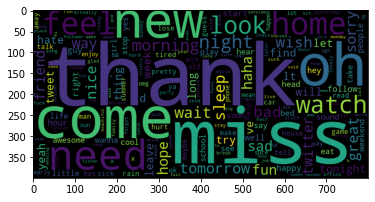

In [82]:
plt.imshow(wc)